In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = 10, 3
from ipywidgets import interact
from sklearn import datasets

import matplotlib.image as mpimg
import numpy as np

from scipy import ndimage

In [70]:
def displayImg(img):
    plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [71]:
def getImage(digit, feature):
    img=mpimg.imread('digit_' + str(digit) + '/feature' + str(feature) + '.png')
    return img
    

In [72]:
THRES = 0.28
c = 1
l = 0
def filterImg( img ): # contrast, luminosity, image
#     tresh = np.average(img) - 0.2
    result = np.zeros((img.shape[0], img.shape[1]) )
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            contrast_value = float(c) * float(img[i,j,1]) + float(l)
            if contrast_value < THRES:
                v = 1
            else:
                v = 0
            result[i,j] = v #v
#             for k in range(img.shape[2]):
#                 result[i,j,k] = v # img[i,j,0]
    return result

--------------------------------


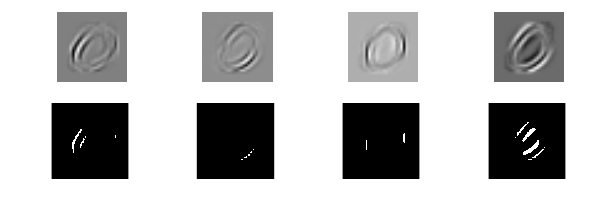

--------------------------------


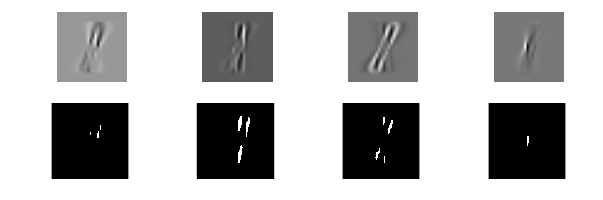

--------------------------------


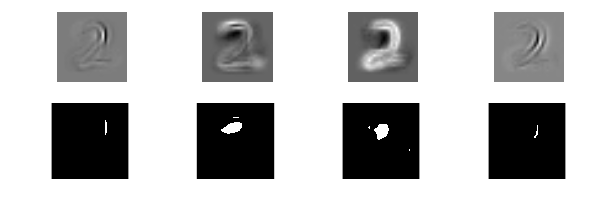

--------------------------------


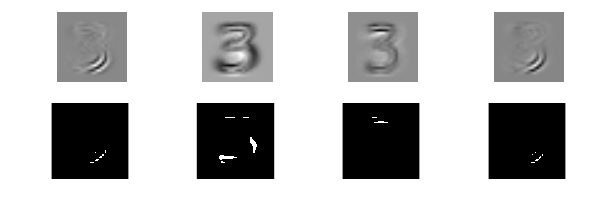

--------------------------------


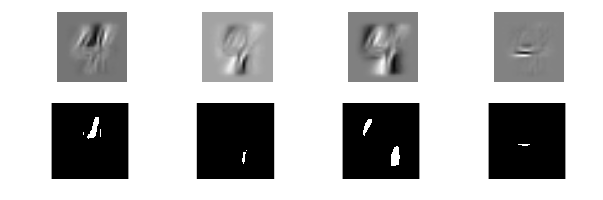

--------------------------------


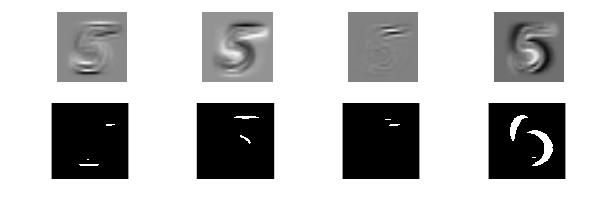

--------------------------------


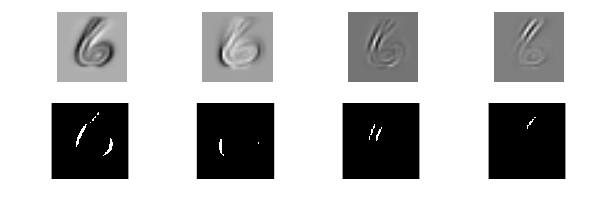

--------------------------------


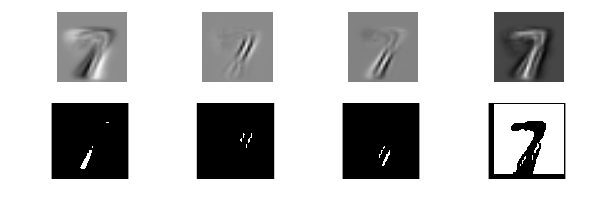

In [ ]:

for i in range(10):
    print "--------------------------------"
    f, ((ax1, ax2, ax3, ax4), (f1, f2, f3, f4) ) = plt.subplots( ncols=4, nrows =2,  sharex=True, sharey=True)
    img0 = getImage(i,0)
    img1 = getImage(i,1)
    img2 = getImage(i, 2)
    img3 = getImage(i, 3)
#     displayImg(filterImg(img))
    ax1.imshow(img0, cmap=plt.cm.gray, interpolation='nearest')
    ax2.imshow(img1, cmap=plt.cm.gray, interpolation='nearest')
    ax3.imshow(img2, cmap=plt.cm.gray, interpolation='nearest')
    ax4.imshow(img3, cmap=plt.cm.gray, interpolation='nearest')
    f1.imshow(filterImg(img0), cmap=plt.cm.gray, interpolation='nearest')
    f2.imshow(filterImg(img1), cmap=plt.cm.gray, interpolation='nearest')
    f3.imshow(filterImg(img2), cmap=plt.cm.gray, interpolation='nearest')
    f4.imshow(filterImg(img3), cmap=plt.cm.gray, interpolation='nearest')
#     displayImg(img)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    f1.axis('off')
    f2.axis('off')
    f3.axis('off')
    f4.axis('off')
    plt.show()